# Лабораторная работа 5
> Выполнена студентом: **Гусаровым А.С. 22ВВИм2**

Цель лабораторной работы:
Реализация цветовой сегментации

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


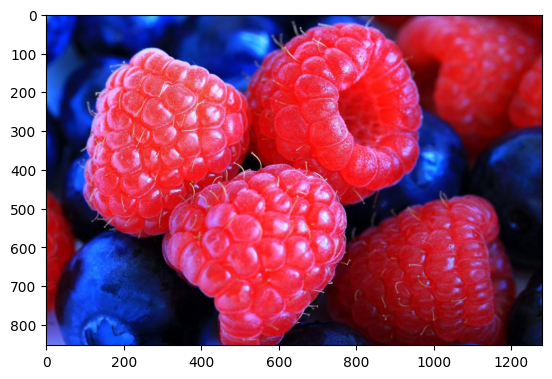

In [2]:
image = cv.imread('lab5.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
plt.imshow(image_rgb)
plt.show()

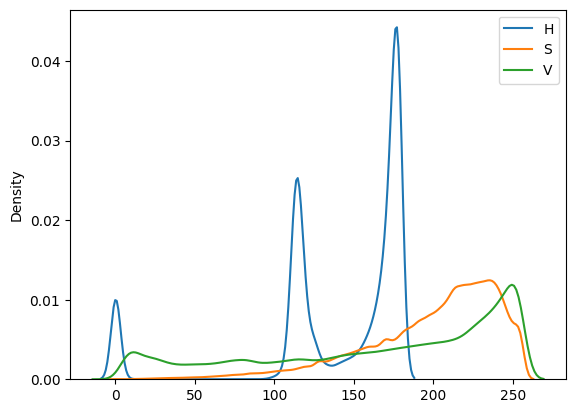

In [3]:
for layer in range(image_hsv.shape[-1]):
	lv = image_hsv[...,layer].flatten()
	sns.kdeplot(lv)
plt.legend(labels=['H', 'S', 'V'])

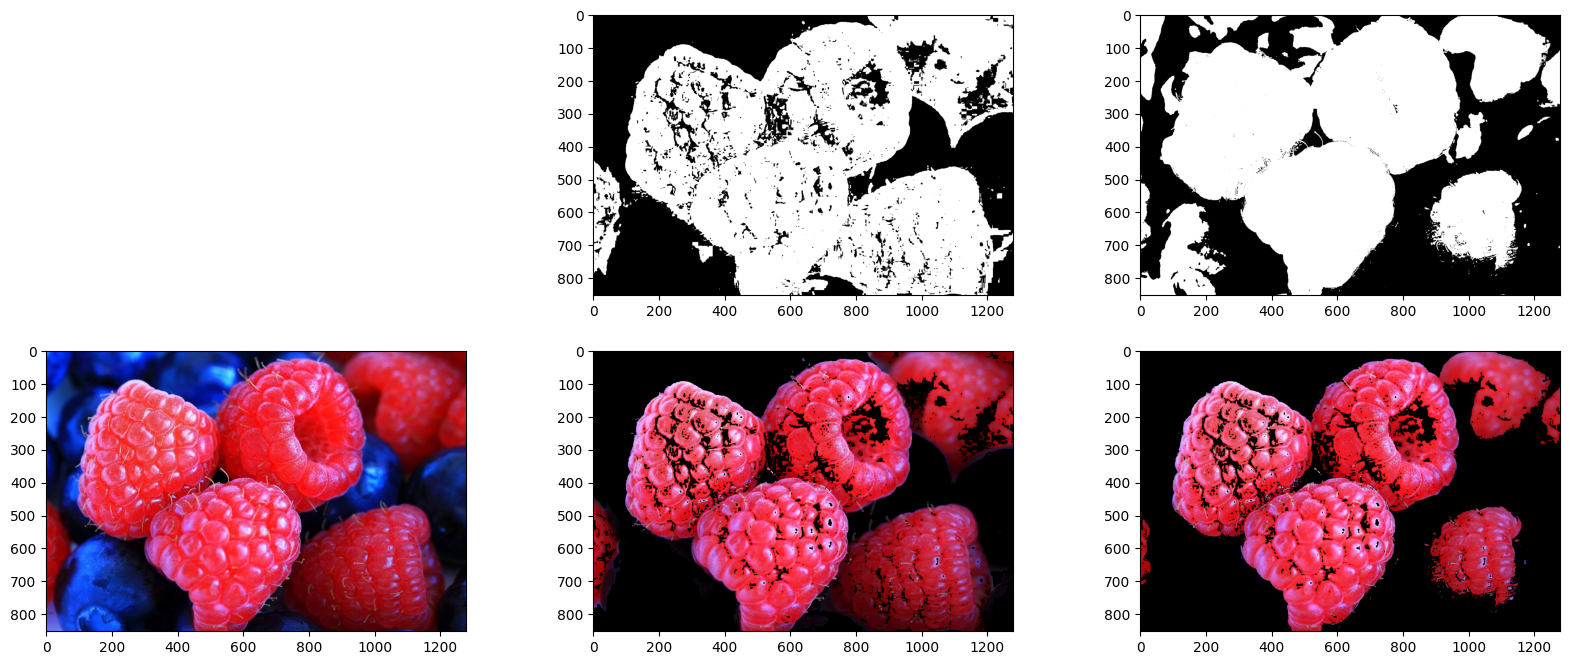

In [4]:
mask_h = cv.inRange(image_hsv[...,0], 130, 255)
mask_v = cv.inRange(image_hsv[...,2], 160, 255)
image_after_mask_h = cv.bitwise_and(image_rgb, image_rgb, mask=mask_h)
image_after_mask_v = cv.bitwise_and(image_after_mask_h, image_after_mask_h, mask=mask_v)
result_img = image_after_mask_v

plt.figure(figsize=(20,8))
plt.subplot(2, 3, 2)
plt.imshow(mask_h, cmap="gray")
plt.subplot(2, 3, 3)
plt.imshow(mask_v, cmap="gray")
plt.subplot(2, 3, 4)
plt.imshow(image_rgb)
plt.subplot(2, 3, 5)
plt.imshow(image_after_mask_h)
plt.subplot(2, 3, 6)
plt.imshow(image_after_mask_v)
plt.show()

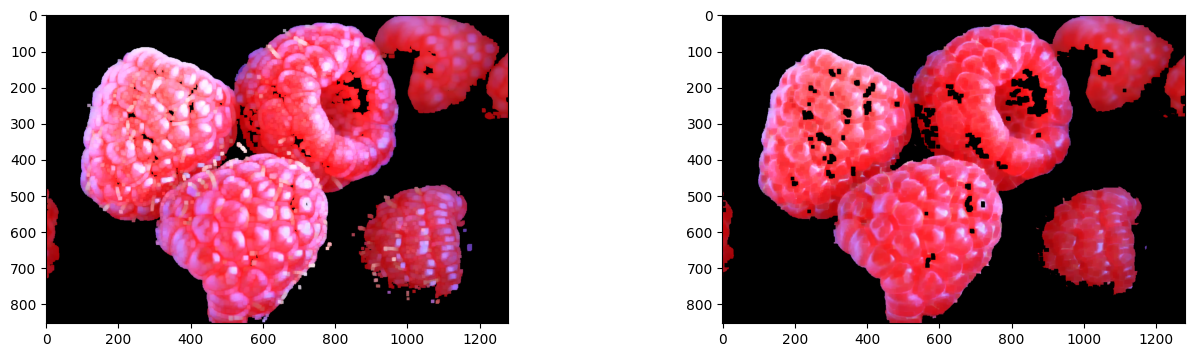

In [5]:

image_dilate = cv.dilate(result_img, np.ones((8,8), np.int8))
image_erode = cv.erode(image_dilate, np.ones((10,10), np.int8))
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.imshow(image_dilate)
plt.subplot(1, 2, 2)
plt.imshow(image_erode)
plt.show()

In [6]:
from sklearn.cluster import DBSCAN

points = []
x_sz, y_sz = image_erode.shape[:2]
for i in range(x_sz):
	for j in range(y_sz):
		if image_erode[i][j].any():
			points.append([j, x_sz - i])
points = np.array(points)

db = DBSCAN(eps=10, min_samples=10).fit(points)
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print('Обнаружено ягод: %d' % n_clusters)

Обнаружено ягод: 7
